In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
sb.set()

In [2]:
data = pd.read_csv('CAR DETAILS FROM CAR DEKHO.csv')

In [3]:
data.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner
0,Maruti 800 AC,2007,60000,70000,Petrol,Individual,Manual,First Owner
1,Maruti Wagon R LXI Minor,2007,135000,50000,Petrol,Individual,Manual,First Owner
2,Hyundai Verna 1.6 SX,2012,600000,100000,Diesel,Individual,Manual,First Owner
3,Datsun RediGO T Option,2017,250000,46000,Petrol,Individual,Manual,First Owner
4,Honda Amaze VX i-DTEC,2014,450000,141000,Diesel,Individual,Manual,Second Owner


In [4]:
data.describe(include='all')

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner
count,4340,4340.000000,4.340000e+03,4340.000000,4340,4340,4340,4340
unique,1491,NaN,NaN,NaN,5,3,2,5
top,Maruti Swift Dzire VDI,NaN,NaN,NaN,Diesel,Individual,Manual,First Owner
freq,69,NaN,NaN,NaN,2153,3244,3892,2832
mean,NaN,2013.090783,5.041273e+05,66215.777419,NaN,NaN,NaN,NaN
std,NaN,4.215344,5.785487e+05,46644.102194,NaN,NaN,NaN,NaN
min,NaN,1992.000000,2.000000e+04,1.000000,NaN,NaN,NaN,NaN
25%,NaN,2011.000000,2.087498e+05,35000.000000,NaN,NaN,NaN,NaN
50%,NaN,2014.000000,3.500000e+05,60000.000000,NaN,NaN,NaN,NaN
75%,NaN,2016.000000,6.000000e+05,90000.000000,NaN,NaN,NaN,NaN


In [5]:
data_cleaning = data.drop(['name','seller_type', 'transmission'], axis=1)

In [6]:
data_cleaning.describe(include='all')

,year,selling_price,km_driven,fuel,owner
count,4340.000000,4.340000e+03,4340.000000,4340,4340
unique,NaN,NaN,NaN,5,5
top,NaN,NaN,NaN,Diesel,First Owner
freq,NaN,NaN,NaN,2153,2832
mean,2013.090783,5.041273e+05,66215.777419,NaN,NaN
std,4.215344,5.785487e+05,46644.102194,NaN,NaN
min,1992.000000,2.000000e+04,1.000000,NaN,NaN
25%,2011.000000,2.087498e+05,35000.000000,NaN,NaN
50%,2014.000000,3.500000e+05,60000.000000,NaN,NaN
75%,2016.000000,6.000000e+05,90000.000000,NaN,NaN


In [7]:
data_cleaning.isnull().sum()

year             0
selling_price    0
km_driven        0
fuel             0
owner            0
dtype: int64

In [8]:
data_cleaning =data_cleaning.dropna(axis=0)

In [9]:
data_cleaning.describe()

,year,selling_price,km_driven
count,4340.000000,4.340000e+03,4340.000000
mean,2013.090783,5.041273e+05,66215.777419
std,4.215344,5.785487e+05,46644.102194
min,1992.000000,2.000000e+04,1.000000
25%,2011.000000,2.087498e+05,35000.000000
50%,2014.000000,3.500000e+05,60000.000000
75%,2016.000000,6.000000e+05,90000.000000
max,2020.000000,8.900000e+06,806599.000000


C:\Users\gowth\AppData\Local\Temp\ipykernel_364\4159920756.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sb.distplot(np.log(data_cleaning['selling_price']))


<Axes: xlabel='selling_price', ylabel='Density'>

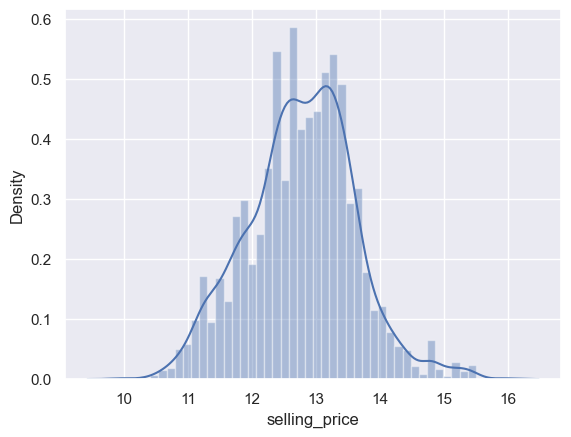

In [10]:
sb.distplot(np.log(data_cleaning['selling_price']))

C:\Users\gowth\AppData\Local\Temp\ipykernel_364\4027601522.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sb.distplot(data_cleaning['selling_price'])


<Axes: xlabel='selling_price', ylabel='Density'>

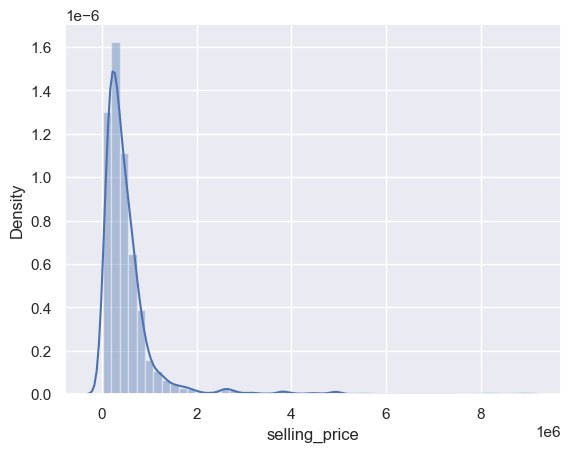

In [11]:
sb.distplot(data_cleaning['selling_price'])

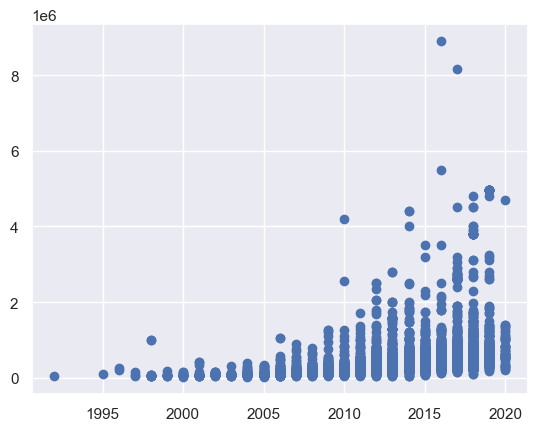

In [12]:
plt.scatter(data_cleaning['year'], data_cleaning['selling_price'])


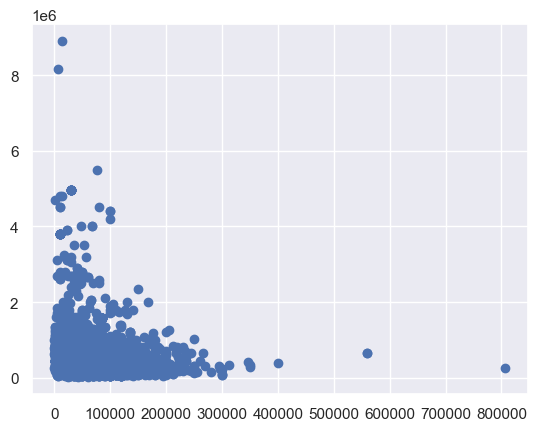

In [13]:
plt.scatter(data_cleaning['km_driven'], data_cleaning['selling_price'])


In [14]:
q= data_cleaning['km_driven'].quantile(0.9)
q

120000.0

In [15]:
data_cleaning = data_cleaning[data_cleaning['km_driven'] <= q]
data_cleaning

,year,selling_price,km_driven,fuel,owner
0,2007,60000,70000,Petrol,First Owner
1,2007,135000,50000,Petrol,First Owner
2,2012,600000,100000,Diesel,First Owner
3,2017,250000,46000,Petrol,First Owner
6,2016,550000,25000,Petrol,First Owner
...,...,...,...,...,...
4335,2014,409999,80000,Diesel,Second Owner
4336,2014,409999,80000,Diesel,Second Owner
4337,2009,110000,83000,Petrol,Second Owner
4338,2016,865000,90000,Diesel,First Owner


In [16]:
data_cleaning.describe(include = 'all')

,year,selling_price,km_driven,fuel,owner
count,4038.000000,4.038000e+03,4038.000000,4038,4038
unique,NaN,NaN,NaN,5,5
top,NaN,NaN,NaN,Petrol,First Owner
freq,NaN,NaN,NaN,2078,2691
mean,2013.248638,5.112834e+05,57991.672363,NaN,NaN
std,4.244811,5.913862e+05,32146.744481,NaN,NaN
min,1992.000000,2.000000e+04,1.000000,NaN,NaN
25%,2011.000000,2.100000e+05,30525.000000,NaN,NaN
50%,2014.000000,3.640000e+05,55340.000000,NaN,NaN
75%,2017.000000,6.000000e+05,80000.000000,NaN,NaN


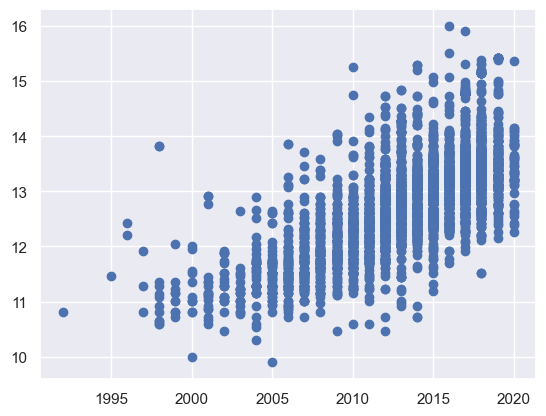

In [17]:
plt.scatter(data_cleaning['year'], np.log(data_cleaning['selling_price']))

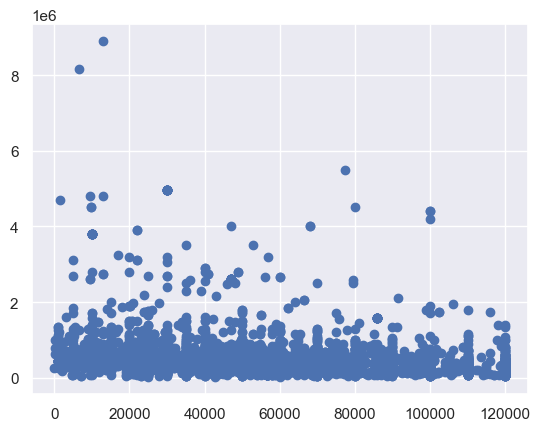

In [18]:
plt.scatter(data_cleaning['km_driven'], data_cleaning['selling_price'])

In [19]:
l_q = data_cleaning['year'].quantile(0.0032)
l_q

1998.0

In [20]:
data_cleaning = data_cleaning[data_cleaning['year'] > l_q]

In [21]:
data_cleaning.describe(include ='all')

,year,selling_price,km_driven,fuel,owner
count,4019.000000,4.019000e+03,4019.000000,4019,4019
unique,NaN,NaN,NaN,5,5
top,NaN,NaN,NaN,Petrol,First Owner
freq,NaN,NaN,NaN,2063,2689
mean,2013.324708,5.128441e+05,57932.414282,NaN,NaN
std,4.106450,5.920188e+05,32147.676497,NaN,NaN
min,1999.000000,2.000000e+04,1.000000,NaN,NaN
25%,2011.000000,2.100000e+05,30196.500000,NaN,NaN
50%,2014.000000,3.650000e+05,55340.000000,NaN,NaN
75%,2017.000000,6.000000e+05,80000.000000,NaN,NaN


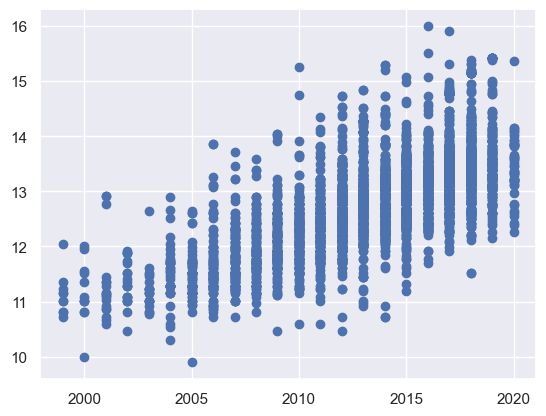

In [22]:
plt.scatter(data_cleaning['year'], np.log(data_cleaning['selling_price']))

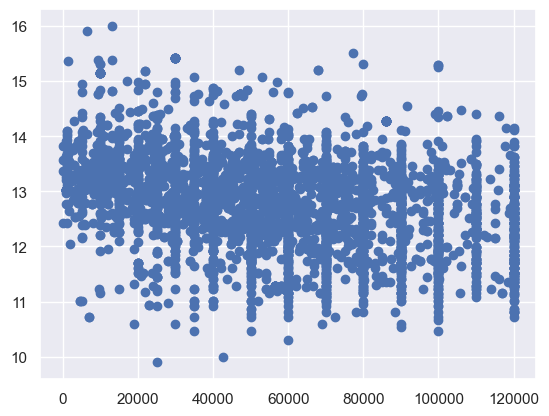

In [23]:
plt.scatter(data_cleaning['km_driven'], np.log(data_cleaning['selling_price']))

In [24]:
data_cleaning['log_price'] = np.log(data_cleaning['selling_price'])

C:\Users\gowth\AppData\Local\Temp\ipykernel_364\680967012.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_cleaning['log_price'] = np.log(data_cleaning['selling_price'])


In [25]:
data_cleaning.describe()

,year,selling_price,km_driven,log_price
count,4019.000000,4.019000e+03,4019.000000,4019.000000
mean,2013.324708,5.128441e+05,57932.414282,12.780495
std,4.106450,5.920188e+05,32147.676497,0.838367
min,1999.000000,2.000000e+04,1.000000,9.903488
25%,2011.000000,2.100000e+05,30196.500000,12.254863
50%,2014.000000,3.650000e+05,55340.000000,12.807653
75%,2017.000000,6.000000e+05,80000.000000,13.304685
max,2020.000000,8.900000e+06,120000.000000,16.001562


In [26]:
data_cleaning.describe(include='all')

,year,selling_price,km_driven,fuel,owner,log_price
count,4019.000000,4.019000e+03,4019.000000,4019,4019,4019.000000
unique,NaN,NaN,NaN,5,5,NaN
top,NaN,NaN,NaN,Petrol,First Owner,NaN
freq,NaN,NaN,NaN,2063,2689,NaN
mean,2013.324708,5.128441e+05,57932.414282,NaN,NaN,12.780495
std,4.106450,5.920188e+05,32147.676497,NaN,NaN,0.838367
min,1999.000000,2.000000e+04,1.000000,NaN,NaN,9.903488
25%,2011.000000,2.100000e+05,30196.500000,NaN,NaN,12.254863
50%,2014.000000,3.650000e+05,55340.000000,NaN,NaN,12.807653
75%,2017.000000,6.000000e+05,80000.000000,NaN,NaN,13.304685


### Adding Dummies

In [28]:
data_transform = data_cleaning

In [29]:
data_transform.describe()

,year,selling_price,km_driven,log_price
count,4019.000000,4.019000e+03,4019.000000,4019.000000
mean,2013.324708,5.128441e+05,57932.414282,12.780495
std,4.106450,5.920188e+05,32147.676497,0.838367
min,1999.000000,2.000000e+04,1.000000,9.903488
25%,2011.000000,2.100000e+05,30196.500000,12.254863
50%,2014.000000,3.650000e+05,55340.000000,12.807653
75%,2017.000000,6.000000e+05,80000.000000,13.304685
max,2020.000000,8.900000e+06,120000.000000,16.001562


In [30]:
data_transform = pd.get_dummies(data_transform,drop_first=True)
data_transform

,year,selling_price,km_driven,log_price,fuel_Diesel,fuel_Electric,fuel_LPG,fuel_Petrol,owner_Fourth & Above Owner,owner_Second Owner,owner_Test Drive Car,owner_Third Owner
0,2007,60000,70000,11.002100,False,False,False,True,False,False,False,False
1,2007,135000,50000,11.813030,False,False,False,True,False,False,False,False
2,2012,600000,100000,13.304685,True,False,False,False,False,False,False,False
3,2017,250000,46000,12.429216,False,False,False,True,False,False,False,False
6,2016,550000,25000,13.217674,False,False,False,True,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...
4335,2014,409999,80000,12.923910,True,False,False,False,False,True,False,False
4336,2014,409999,80000,12.923910,True,False,False,False,False,True,False,False
4337,2009,110000,83000,11.608236,False,False,False,True,False,True,False,False
4338,2016,865000,90000,13.670485,True,False,False,False,False,False,False,False


In [31]:
data_transform.columns

Index(['year', 'selling_price', 'km_driven', 'log_price', 'fuel_Diesel',
       'fuel_Electric', 'fuel_LPG', 'fuel_Petrol',
       'owner_Fourth & Above Owner', 'owner_Second Owner',
       'owner_Test Drive Car', 'owner_Third Owner'],
      dtype='object')

In [32]:
features = pd.DataFrame()

In [33]:
target = pd.DataFrame()
target['price'] = data_transform['log_price']

In [34]:
features

""


In [35]:
features = data_transform['year']

In [36]:
features = data_transform[['year','km_driven', 'fuel_Diesel', 'fuel_Electric',
       'fuel_LPG', 'fuel_Petrol', 'owner_Fourth & Above Owner',
       'owner_Second Owner', 'owner_Test Drive Car', 'owner_Third Owner']]

In [37]:
features.columns

Index(['year', 'km_driven', 'fuel_Diesel', 'fuel_Electric', 'fuel_LPG',
       'fuel_Petrol', 'owner_Fourth & Above Owner', 'owner_Second Owner',
       'owner_Test Drive Car', 'owner_Third Owner'],
      dtype='object')

In [38]:
features.isnull().sum()

year                          0
km_driven                     0
fuel_Diesel                   0
fuel_Electric                 0
fuel_LPG                      0
fuel_Petrol                   0
owner_Fourth & Above Owner    0
owner_Second Owner            0
owner_Test Drive Car          0
owner_Third Owner             0
dtype: int64

In [39]:
features = features.astype(int)

In [40]:
features.describe(include='all')

,year,km_driven,fuel_Diesel,fuel_Electric,fuel_LPG,fuel_Petrol,owner_Fourth & Above Owner,owner_Second Owner,owner_Test Drive Car,owner_Third Owner
count,4019.000000,4019.000000,4019.000000,4019.000000,4019.000000,4019.000000,4019.000000,4019.000000,4019.000000,4019.000000
mean,2013.324708,57932.414282,0.472008,0.000249,0.004479,0.513312,0.015924,0.248569,0.004230,0.062205
std,4.106450,32147.676497,0.499278,0.015774,0.066782,0.499885,0.125199,0.432237,0.064908,0.241557
min,1999.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2011.000000,30196.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,2014.000000,55340.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
75%,2017.000000,80000.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
max,2020.000000,120000.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [41]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [42]:
vif = pd.DataFrame()

vif['Features'] = ['year', 'km_driven', 'fuel_Diesel', 'fuel_Electric', 'fuel_LPG',
       'fuel_Petrol', 'owner_Fourth & Above Owner', 'owner_Second Owner',
       'owner_Test Drive Car', 'owner_Third Owner']

vif['colinearity'] = [ variance_inflation_factor(features.values,i) for i in range(features.shape[1])]

In [43]:
vif

,Features,colinearity
0,year,-5.721830
1,km_driven,0.000470
2,fuel_Diesel,48.577080
3,fuel_Electric,1.025529
4,fuel_LPG,1.451619
5,fuel_Petrol,52.711677
6,owner_Fourth & Above Owner,1.056672
7,owner_Second Owner,1.555260
8,owner_Test Drive Car,1.016908
9,owner_Third Owner,1.181866


In [44]:
features_ = features.drop('fuel_Petrol',axis=1)

In [45]:
features_

,year,km_driven,fuel_Diesel,fuel_Electric,fuel_LPG,owner_Fourth & Above Owner,owner_Second Owner,owner_Test Drive Car,owner_Third Owner
0,2007,70000,0,0,0,0,0,0,0
1,2007,50000,0,0,0,0,0,0,0
2,2012,100000,1,0,0,0,0,0,0
3,2017,46000,0,0,0,0,0,0,0
6,2016,25000,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...
4335,2014,80000,1,0,0,0,1,0,0
4336,2014,80000,1,0,0,0,1,0,0
4337,2009,83000,0,0,0,0,1,0,0
4338,2016,90000,1,0,0,0,0,0,0


In [46]:
from sklearn.preprocessing import StandardScaler

In [47]:
scaler = StandardScaler()

In [48]:
scaler.fit(features_)

StandardScaler()

In [49]:
features_transform = scaler.transform(features_)

In [50]:
features_transform

array([[-1.54038032,  0.37542643, -0.94549879, ..., -0.57514755,
        -0.06517573, -0.25754726],
       [-1.54038032, -0.24677993, -0.94549879, ..., -0.57514755,
        -0.06517573, -0.25754726],
       [-0.32263208,  1.30873596,  1.05764282, ..., -0.57514755,
        -0.06517573, -0.25754726],
       ...,
       [-1.05328102,  0.77986056, -0.94549879, ...,  1.73868428,
        -0.06517573, -0.25754726],
       [ 0.65156651,  0.99763278,  1.05764282, ..., -0.57514755,
        -0.06517573, -0.25754726],
       [ 0.65156651, -0.55788311, -0.94549879, ..., -0.57514755,
        -0.06517573, -0.25754726]])

In [51]:
target

,price
0,11.002100
1,11.813030
2,13.304685
3,12.429216
6,13.217674
...,...
4335,12.923910
4336,12.923910
4337,11.608236
4338,13.670485


In [52]:
from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test = train_test_split(features_transform,target, test_size = 0.2, random_state = 42)

In [53]:
y_train

,price
4273,13.698977
2867,12.873902
3540,13.049793
3331,13.217674
1528,12.301383
...,...
1212,13.527828
1392,13.458836
926,12.384219
3784,13.017003


In [54]:
from sklearn.linear_model import LinearRegression

reg = LinearRegression()

In [55]:
reg.fit(x_train,y_train)

LinearRegression()

In [56]:
reg.score(x_train,y_train)

0.6020524551557853

In [57]:
yhat =reg.predict(x_test)

In [123]:
residual = yhat - y_test

In [125]:
np.mean(residual)

0.013637839841367093

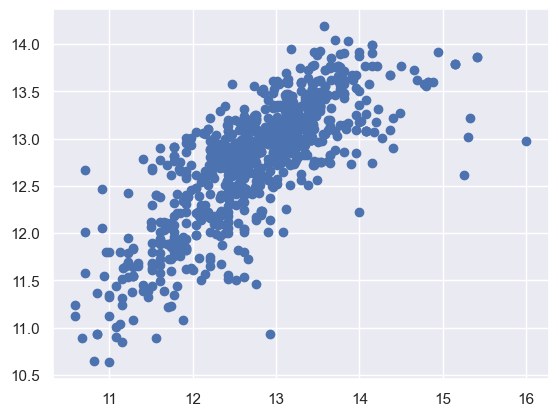

In [127]:
plt.scatter(y_test,yhat)

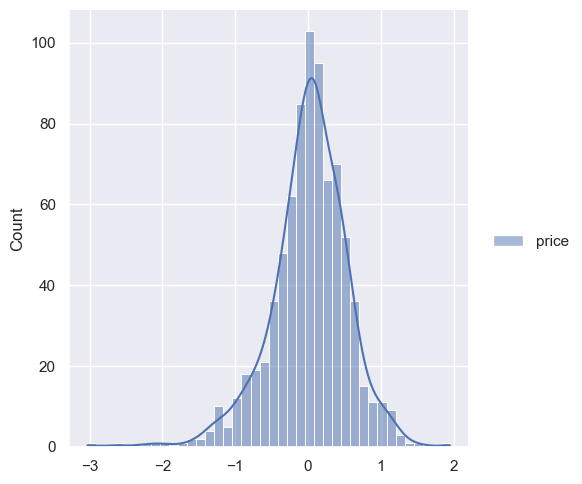

In [129]:
sb.displot(residual,kde = True)